In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv(r"E:\tops\Data science\practical\Classification\polynomial.csv")
dataset.head(3)

,x1,x2,label
0,0.160594,0.482602,1
1,1.198440,-0.542104,0
2,-0.618907,0.728517,0


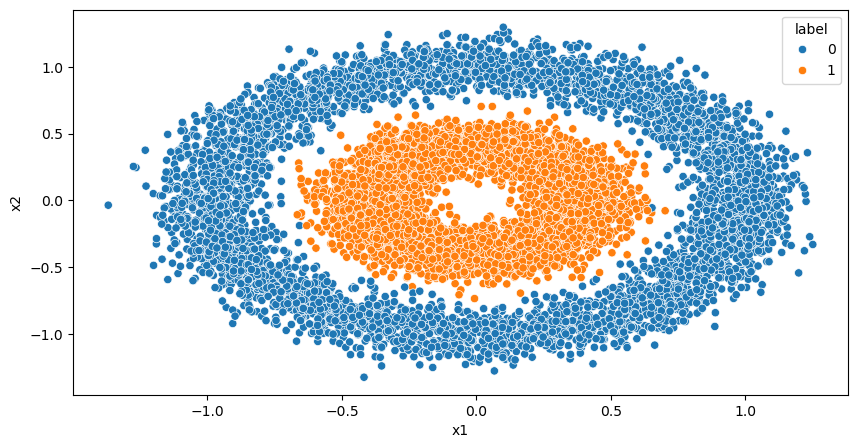

In [4]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="x1", y="x2" ,data=dataset,hue="label")
plt.show()

In [20]:
x= dataset.iloc[:,:-1]
y=dataset["label"]

In [6]:
 from sklearn.model_selection import train_test_split


In [41]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [17]:
lr.score(x_test,y_test)*100

48.949999999999996

In [13]:
from mlxtend.plotting import plot_decision_regions

E:\app\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


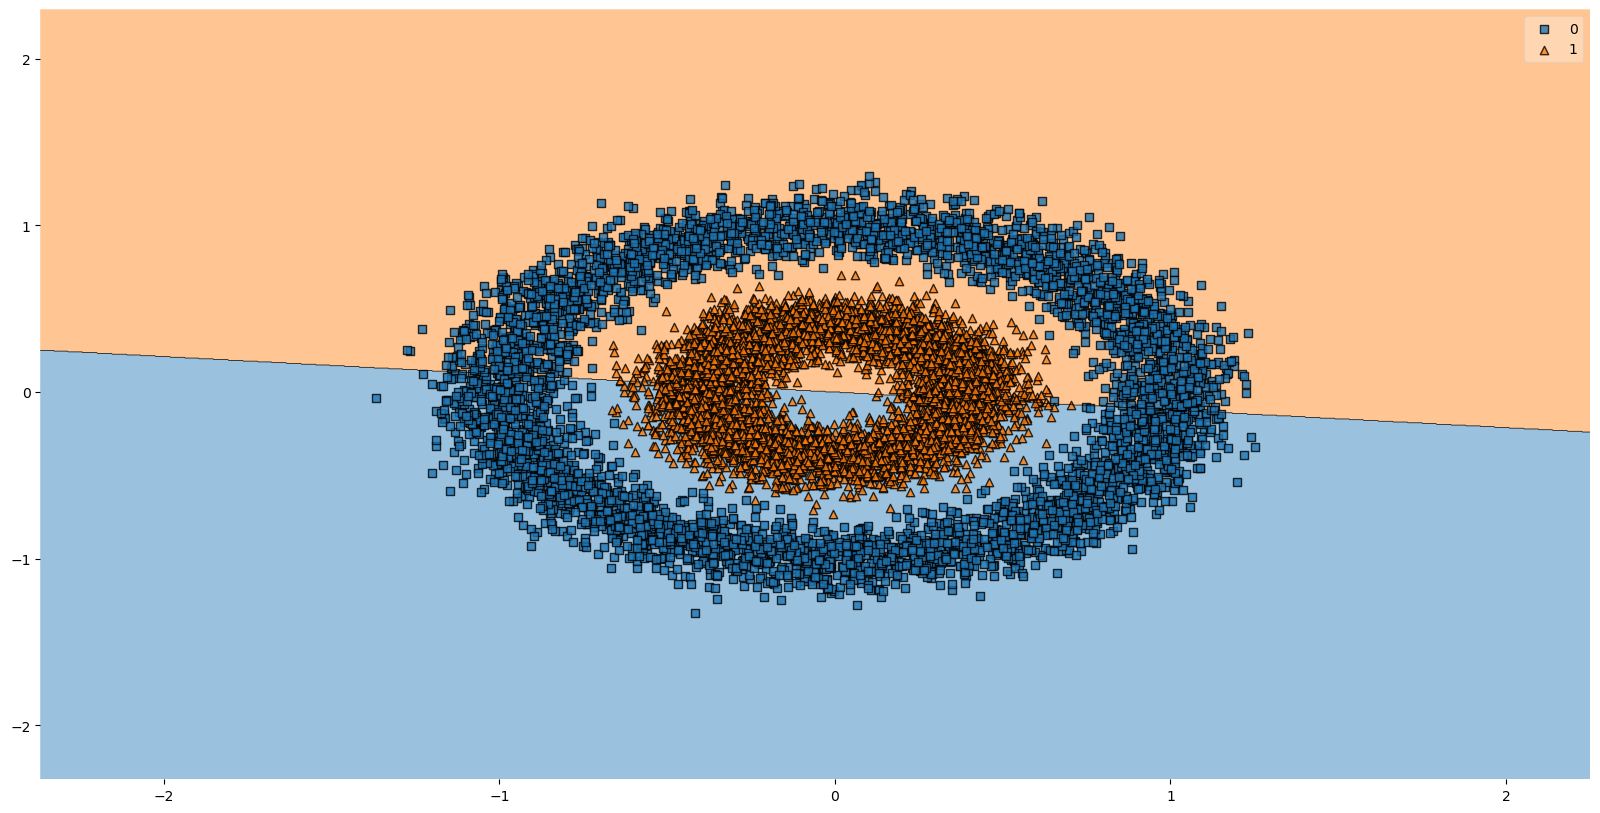

In [18]:
plt.figure(figsize=(20,10))
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [23]:
poly = PolynomialFeatures(degree=6)   # degree = 6 kaafi accha kaam karega
X_train_poly = poly.fit_transform(x_train)
X_test_poly = poly.transform(x_test)

In [24]:
# Scal

ing
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [29]:
from sklearn.metrics import accuracy_score


In [31]:
# Logistic Regression train karna
model = LogisticRegression(max_iter=5000)
model.fit(X_train_poly, y_train)

# Prediction
y_pred = model.predict(X_test_poly)

# Accuracy
acc = accuracy_score(y_test, y_pred)*100
print("Accuracy:", acc)


Accuracy: 99.9


In [44]:
model.score(X_test_poly,y_test)*100

99.9

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1012    1]
 [   1  986]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1013
           1       1.00      1.00      1.00       987

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [36]:
import matplotlib.pyplot as plt

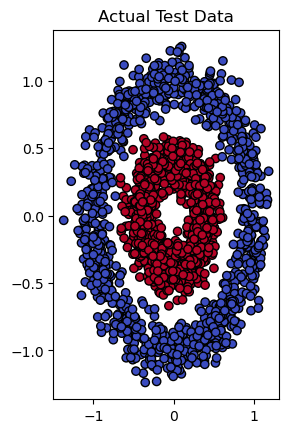

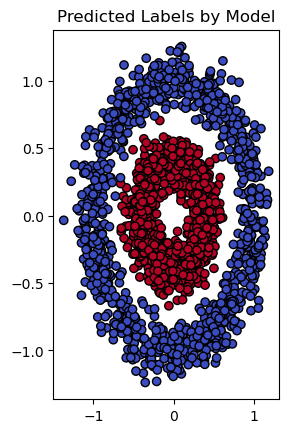

In [37]:


# Actual labels
plt.subplot(1,2,1)
plt.scatter(x_test.values[:,0], x_test.values[:,1], c=y_test, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title("Actual Test Data")
plt.show()

# Predicted labels
plt.subplot(1,2,2)
plt.scatter(x_test.values[:,0], x_test.values[:,1], c=y_pred, cmap=plt.cm.coolwarm, edgecolors="k")
plt.title("Predicted Labels by Model")
plt.show()
